Dataset is about the weekly fuel price of Italy. In this dataset I will work time series with deep learning and machine learning. I will also not avoid using statistical methods. Dataset has these variables:

* Survey date
* Product id 
* Product name
* PRICE
* VAT 
* EXCISE
* NET 
* CHANGE

The data set covers the years 2005-2022.

In [ ]:
import pandas as pd
import numpy as np 
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import plotly.express as px
from keras import optimizers
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from datetime import datetime
import warnings
warnings.simplefilter('ignore')

C:\Users\Seher\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Seher\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Seher\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\Seher\anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
from dash import Dash, dcc, html
import plotly.express as px
from base64 import b64encode
import io
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from flask import Flask
import dash_lazy_load
import dash
import dash_html_components as html

In [ ]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [ ]:
data = pd.read_csv("weekly_fuel_prices_all_data_from_2005_to_20221102.csv",delimiter=";")
## object to datetime
data["SURVEY_DATE"] = data["SURVEY_DATE"].apply(pd.to_datetime, format="%Y-%m-%d")
data["Year"] = data["SURVEY_DATE"].dt.year
data["Month"] =  data["SURVEY_DATE"].dt.month
data["Day"] =  data["SURVEY_DATE"].dt.day_name()
data["Dummy"] = 1

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SURVEY_DATE   5358 non-null   datetime64[ns]
 1   PRODUCT_ID    5358 non-null   int64         
 2   PRODUCT_NAME  5358 non-null   object        
 3   PRICE         5358 non-null   float64       
 4   VAT           5358 non-null   float64       
 5   EXCISE        5358 non-null   float64       
 6   NET           5358 non-null   float64       
 7   CHANGE        5358 non-null   float64       
 8   Year          5358 non-null   int64         
 9   Dummy         5358 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 418.7+ KB


In [8]:
data.isna().sum()

SURVEY_DATE     0
PRODUCT_ID      0
PRODUCT_NAME    0
PRICE           0
VAT             0
EXCISE          0
NET             0
CHANGE          0
Year            0
Month           0
Day             0
Dummy           0
dtype: int64

In [15]:
data["PRODUCT_NAME"].value_counts()

Euro-Super 95         893
Automotive gas oil    893
Heating gas oil       893
LPG                   893
Residual fuel oil     893
Heavy fuel oil        893
Name: PRODUCT_NAME, dtype: int64

In [9]:
dataGroupofYear = data.groupby(pd.Grouper(key="SURVEY_DATE", freq="Y")).agg({"PRICE":sum})
dataGroupofYearbyProduct = data.groupby(["PRODUCT_NAME",pd.Grouper(key="SURVEY_DATE", freq="Y")]).agg({"PRICE":'mean'}).reset_index()

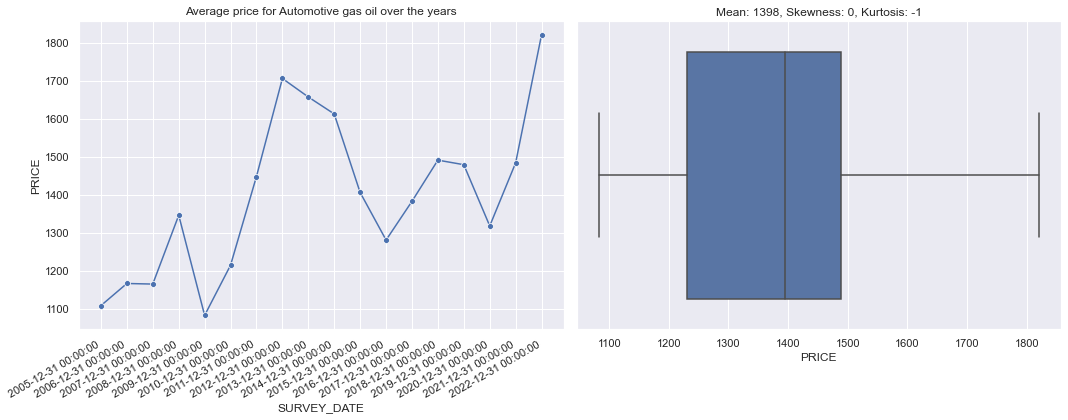

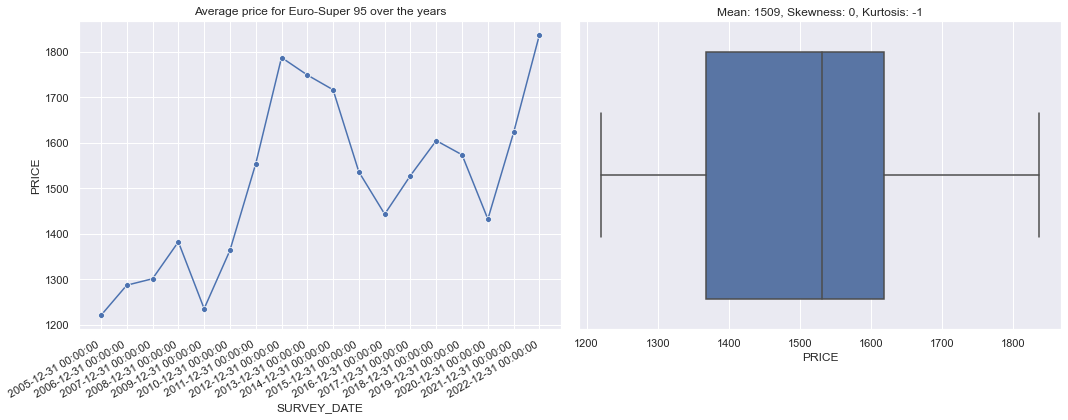

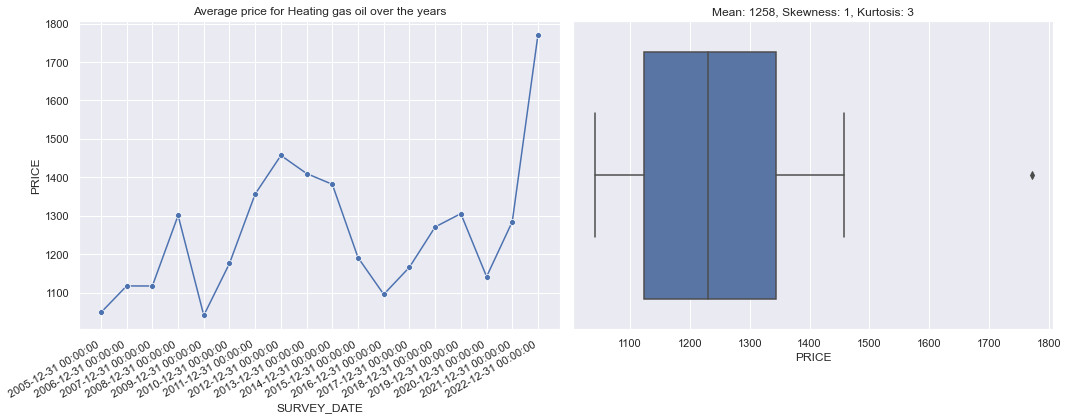

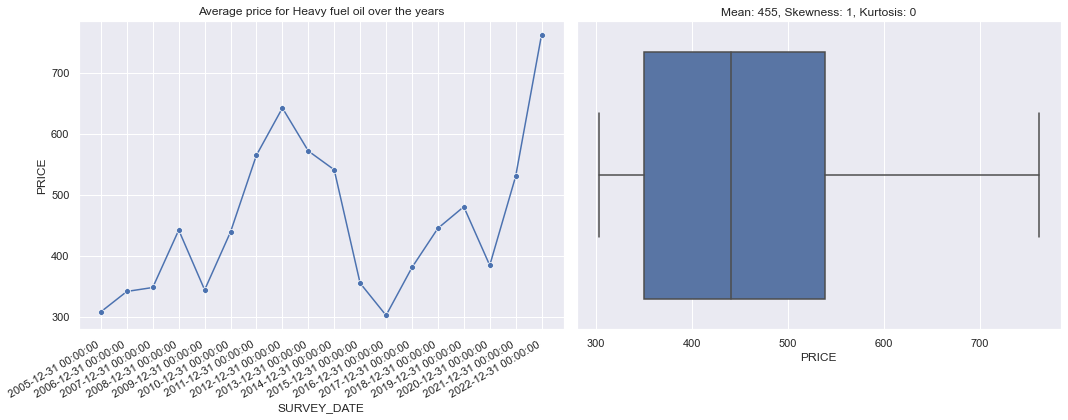

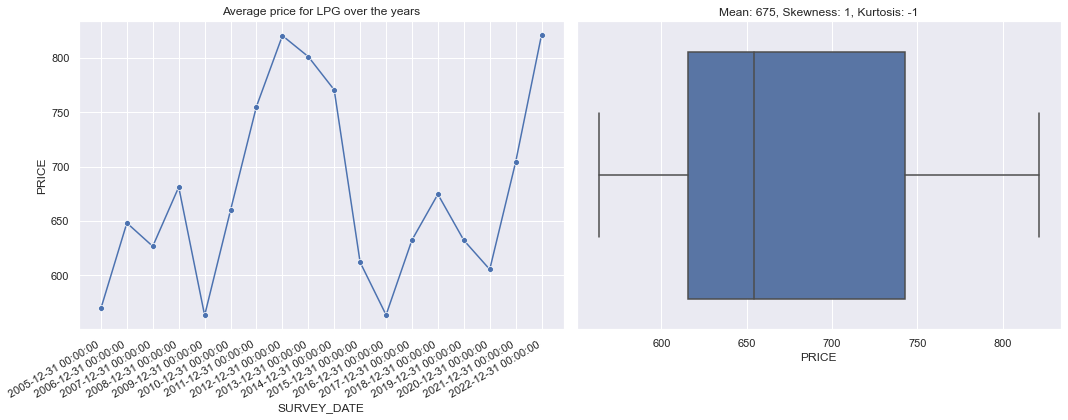

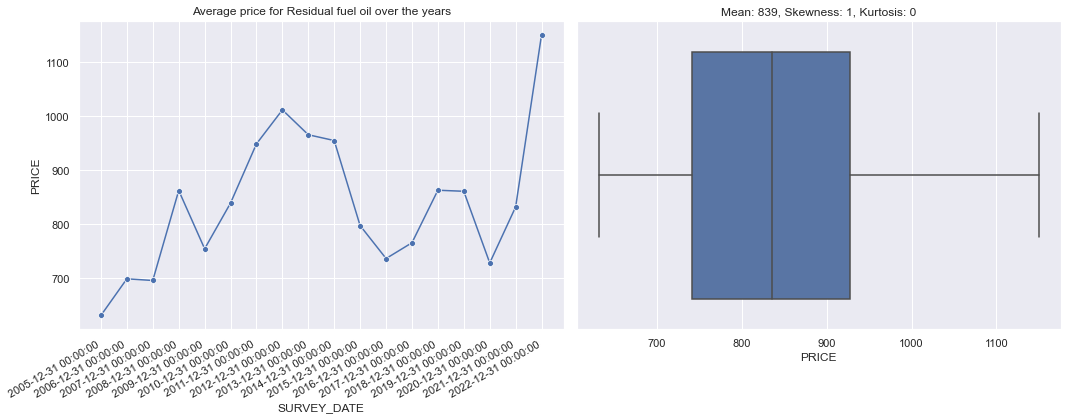

In [13]:
from matplotlib import dates
for pr in dataGroupofYearbyProduct["PRODUCT_NAME"].unique():
    dataFilterofProduct = dataGroupofYearbyProduct.loc[dataGroupofYearbyProduct["PRODUCT_NAME"] == pr].reset_index(drop=True)
    #dataFilterofProductIndex = dataFilterofProduct.set_index("SURVEY_DATE")
    
    mean = round(dataFilterofProduct["PRICE"].mean())
    skew = round(dataFilterofProduct["PRICE"].skew())
    kurt = round(dataFilterofProduct["PRICE"].kurt())
    
    sns.set()
    f = plt.figure(figsize=(15,6))
    ax = f.add_subplot(121)
    sns.lineplot(data=dataFilterofProduct, x="SURVEY_DATE", y="PRICE", marker="o")
    ax.set(xticks=dataFilterofProduct["SURVEY_DATE"].values)
    ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d"))
    ax.set_xticklabels(labels=pd.to_datetime(dataFilterofProduct["SURVEY_DATE"].values), rotation=30, ha='right')
    plt.title(f"Average price for {pr} over the years")
   
    f.tight_layout()
    ax2 = f.add_subplot(122)
    sns.boxplot(dataFilterofProduct["PRICE"],ax=ax2)
    plt.title(f"Mean: {mean}, Skewness: {skew}, Kurtosis: {kurt}")
    f.tight_layout()
    plt.show()
    
    

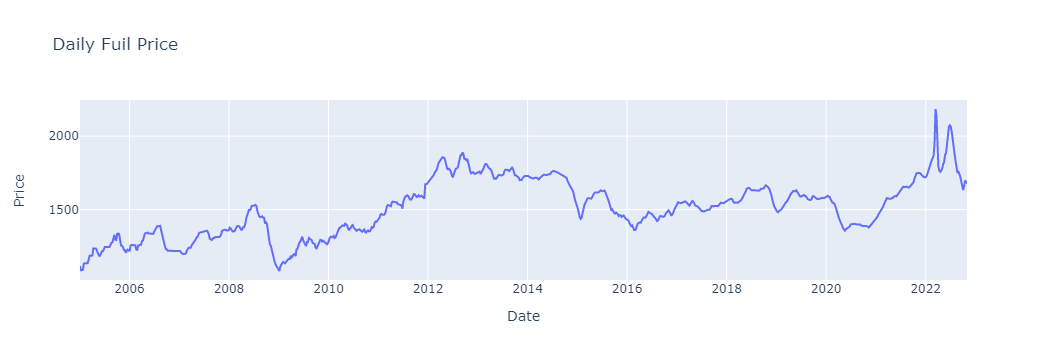

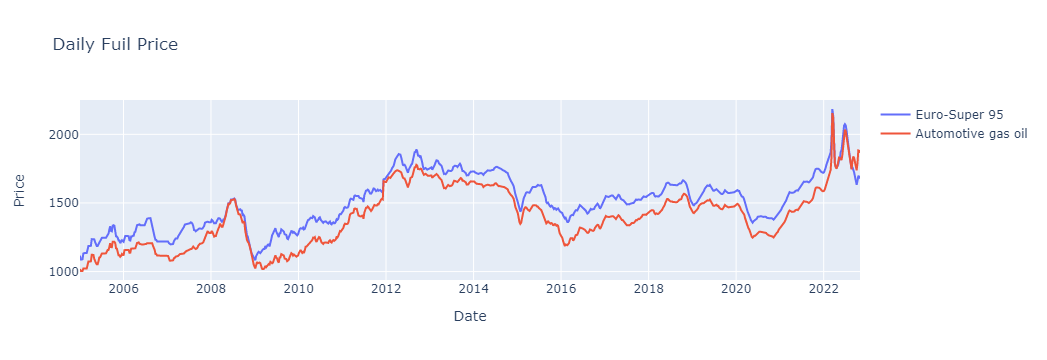

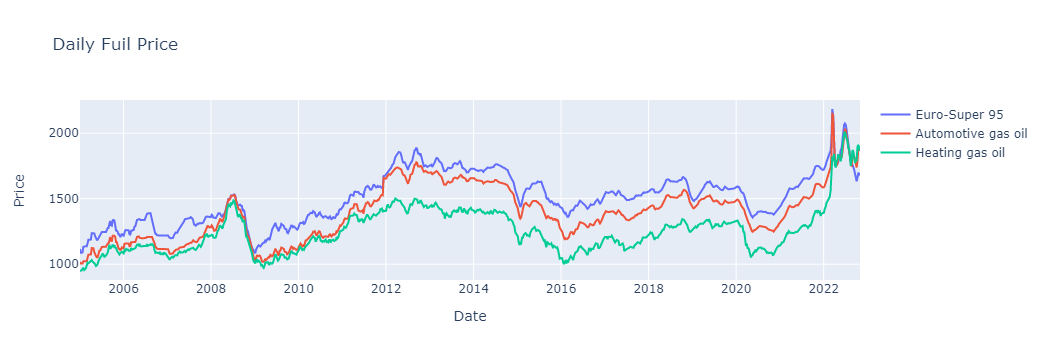

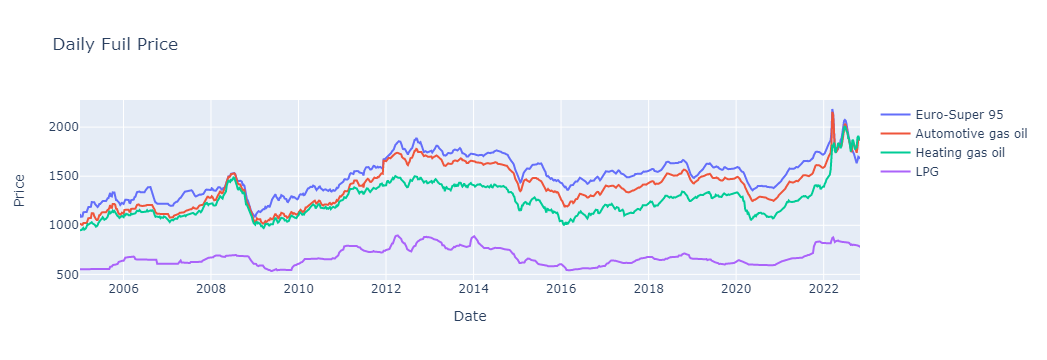

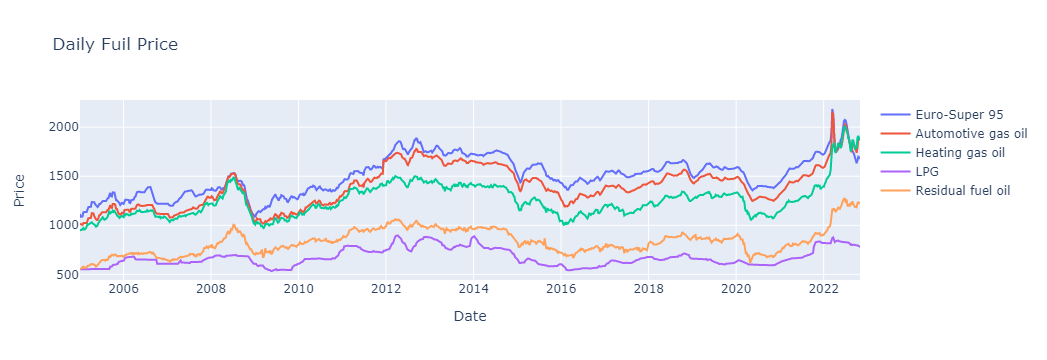

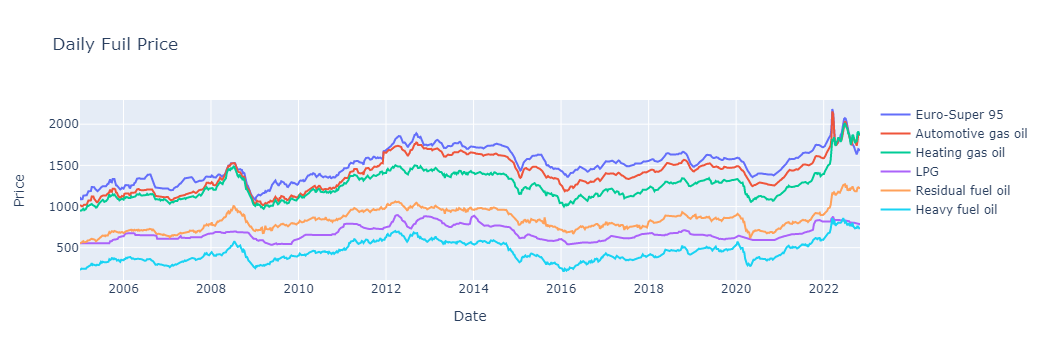

In [6]:
daily_fuil = []
for i in data["PRODUCT_NAME"].unique():
    dataFilterPlot = data.loc[data["PRODUCT_NAME"] == i].reset_index(drop=True)
    daily_fuil.append(go.Scatter(x=dataFilterPlot['SURVEY_DATE'], y=dataFilterPlot['PRICE'],name=(f"{i}")))
    layout = go.Layout(title='Daily Fuil Price', xaxis=dict(title='Date'), yaxis=dict(title='Price'))
    fig = go.Figure(data=daily_fuil, layout=layout)
    iplot(fig)    

In [9]:
daily_fuil = []
buffer = io.StringIO()

for i in data["PRODUCT_NAME"].unique():
    dataFilterPlot = data.loc[data["PRODUCT_NAME"] == i].reset_index(drop=True)
    daily_fuil.append(go.Scatter(x=dataFilterPlot['SURVEY_DATE'], y=dataFilterPlot['PRICE'],name=(f"{i}")))
    layout = go.Layout(title='Daily Fuil Price', xaxis=dict(title='Date'), yaxis=dict(title='Price'))
    
    fig = go.Figure(data=daily_fuil, layout=layout)
    #iplot(fig) 
    fig.write_html(buffer)
    
    fig.update_layout(
    updatemenus=[
        dict(
            #   active=0,
            buttons=list([
                dict(label="Default",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True]}],
                ),
                dict(label="Euro-Super 95",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False]}],
                ),
                dict(label="Automotive gas oil",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False]}],
                ),
                dict(label="Heating gas oil",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False]}],
                ),
                dict(label="LPG",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False]}],
                ),
                dict(label="Residual fuel oil",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False]}],
                ),
                dict(label="Heavy fuel oil",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True]}],
                ),
            ]),
        )
])
    
    fig2 = px.box(data, x="Year", y="PRICE", color='PRODUCT_NAME',
             notched=True)
    fig2.write_html(buffer)
    
    fig2.update_layout(
    updatemenus=[
        dict(
            #   active=0,
            buttons=list([
                dict(label="Default",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True]}],
                ),
                dict(label="Euro-Super 95",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False]}],
                ),
                dict(label="Automotive gas oil",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False]}],
                ),
                dict(label="Heating gas oil",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False]}],
                ),
                dict(label="LPG",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False]}],
                ),
                dict(label="Residual fuel oil",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False]}],
                ),
                dict(label="Heavy fuel oil",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True]}],
                ),
            ]),
        )
])
    
    fig3 = px.pie(data, values="Dummy", names="PRODUCT_NAME",
             color_discrete_sequence=px.colors.sequential.RdBu,
             opacity=0.7, hole=0.5)
    fig3.write_html(buffer)
    
    fig4 = px.box(data, x="PRODUCT_NAME", y="PRICE")
    fig4.write_html(buffer)
    
    html_bytes = buffer.getvalue().encode()
    encoded = b64encode(html_bytes).decode()

    app = JupyterDash(__name__) 
    app.layout = html.Div(children=[
        html.Div([
        html.H1(children='Line Plot'),

        html.Div(children='''
            Price distribution of fuel types according to years
        '''),

        dcc.Graph(
            id='graph1',
            figure=fig
        ),
        html.A(
        html.Button("Download as HTML"), 
        id="download",
        href="data:text/html;base64," + encoded,
        download="plotly_graph.html")    
    ]),
        
        html.Div([
        html.H1(children='Box Plot'),

        html.Div(children='''
            Examination of fuel types in terms of outliers
        '''),

        dcc.Graph(
            id='graph4',
            figure=fig4
        ),  
    ]),  
        
        html.Div([
        html.H1(children='Box Plot'),

        html.Div(children='''
            Examination of fuel types in terms of outliers on a yearly basis
        '''),

        dcc.Graph(
            id='graph2',
            figure=fig2
        ),  
    ]),
        
        html.Div([
        html.H1(children='Distribution of fuel types'),

        html.Div(children='''
            Equal data is available for all 6 fuel types.
        '''),

        dcc.Graph(
            id='graph3',
            figure=fig3
        ),  
    ]),  
        
        
])

if __name__ == '__main__':
    app.run_server(debug=True, mode="inline")   

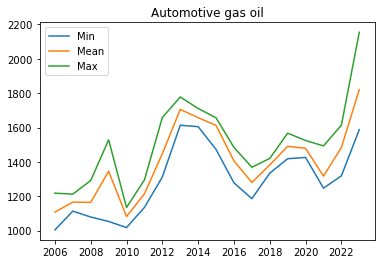

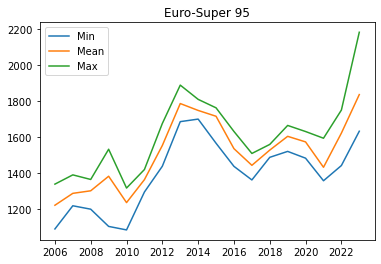

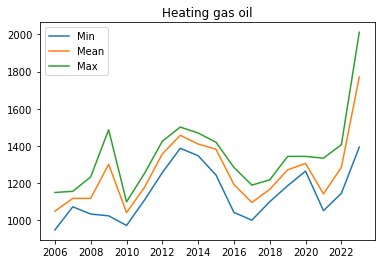

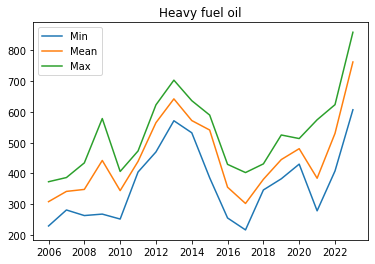

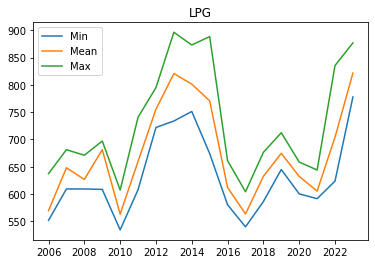

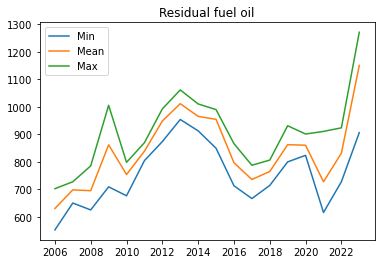

In [47]:
dataGroupofYearbyProduct = data.groupby(["PRODUCT_NAME",pd.Grouper(key="SURVEY_DATE", freq="Y")])["PRICE"].describe().reset_index()
for i in dataGroupofYearbyProduct["PRODUCT_NAME"].unique():
    dataFilter = dataGroupofYearbyProduct.loc[dataGroupofYearbyProduct["PRODUCT_NAME"] == i].reset_index(drop=True)
    
    plt.plot(dataFilter["SURVEY_DATE"], dataFilter["min"], label="Min")
    plt.plot(dataFilter["SURVEY_DATE"], dataFilter["mean"], label="Mean")
    plt.plot(dataFilter["SURVEY_DATE"], dataFilter["max"], label="Max")
    plt.legend()
    plt.title(f"{i}")
    plt.show()
    

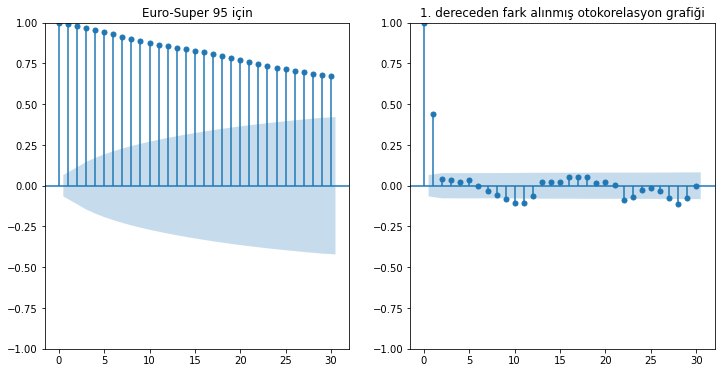

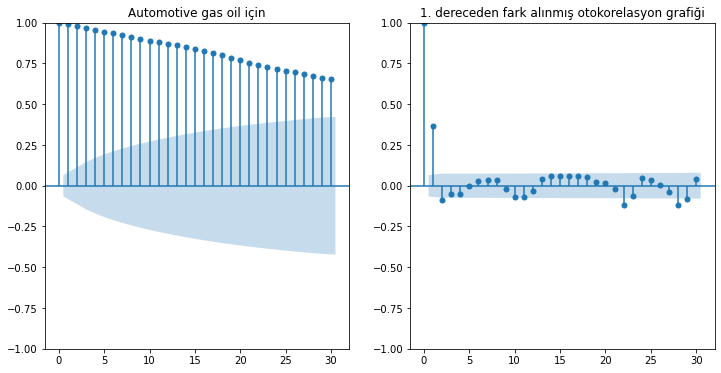

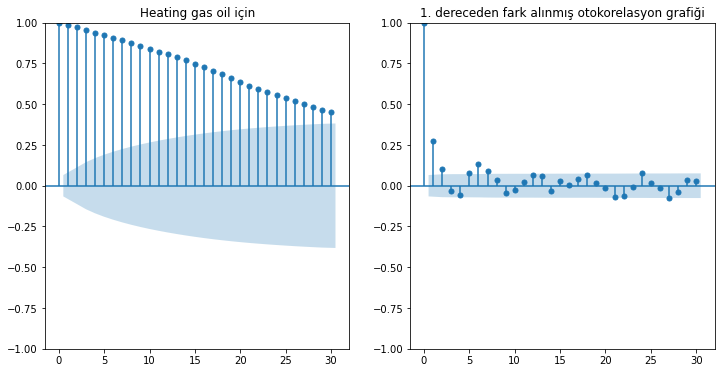

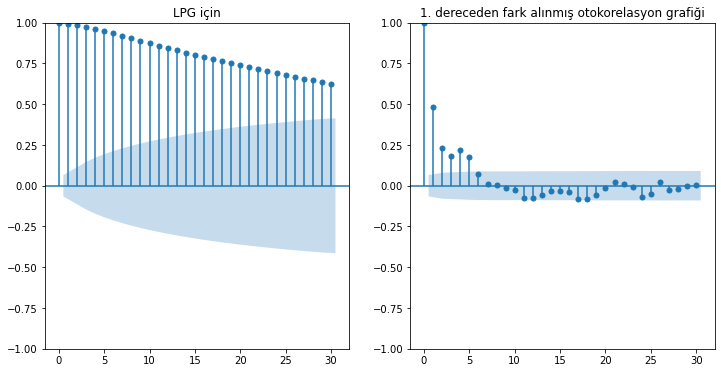

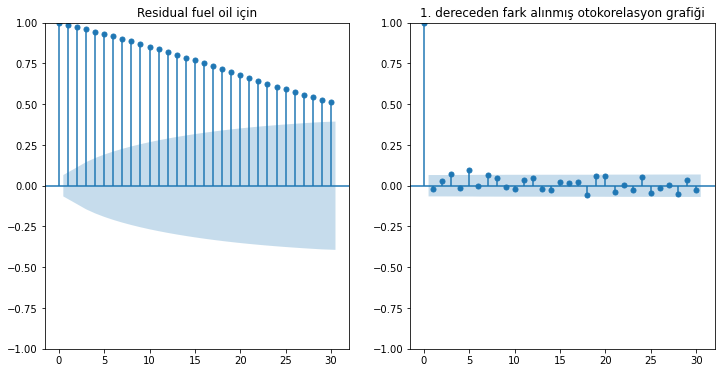

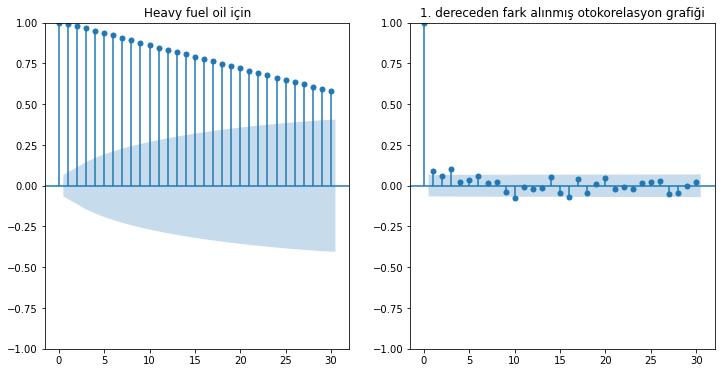

In [53]:
for i in data["PRODUCT_NAME"].unique():
    d = data.loc[data["PRODUCT_NAME"] == i].reset_index()
    d["SURVEY_DATE"] = d["SURVEY_DATE"].apply(pd.to_datetime,format="%Y-%m-%d")
    d.set_index("SURVEY_DATE", inplace=True)
    
    f = plt.figure(figsize=(12,6))
    ax = f.add_subplot(121)
    plot_acf(d["PRICE"], ax=ax)
    plt.title(f"{i} için")
    
    ax2 = f.add_subplot(122)
    plot_acf(d["PRICE"].diff().dropna(), ax=ax2)
    plt.title("1. dereceden fark alınmış otokorelasyon grafiği")
    plt.show()


In [14]:
lis = []
lis2 = []
lis3 = []
for i in data["PRODUCT_NAME"].unique():
    d = data.loc[data["PRODUCT_NAME"] == i].reset_index()
    dataNew = d[["SURVEY_DATE","PRICE"]]
    dataNew["SURVEY_DATE"] = dataNew["SURVEY_DATE"].apply(pd.to_datetime,format="%Y-%m-%d")
    dataNew.set_index("SURVEY_DATE",inplace=True)  
    dataNew.sort_index(inplace=True)

    acf, ci= sm.tsa.acf(dataNew, alpha=0.05)
    
    for j in range(len(acf)):
        newCi = ci[j] - acf[j]
        lis.append({"PRODUCT_NAME":i,"Lag Lenght":j+1,
                   "Lower":newCi[0],
                   "Upper":newCi[1],"Autocorrelation":acf[j]})
        
    acfDiff, ciDiff = sm.tsa.acf(dataNew.diff().dropna(), alpha=0.05)   
    for k in range(len(acfDiff)): 
        newCiDiff = ciDiff[k] - acfDiff[k]
        lis2.append({"Lower Diff":newCiDiff[0],
                   "Upper Diff":newCiDiff[1],"Diff Autocorrelation":acfDiff[k]})
        
        
    acfDiff2, ciDiff2 = sm.tsa.acf(dataNew.diff().diff().diff().dropna(), alpha=0.05)   
    for m in range(len(acfDiff2)): 
        newCiDiff2 = ciDiff2[m] - acfDiff2[m]
        if i == "LPG":
            lis3.append({"Lower Diff2":newCiDiff2[0],
                   "Upper Diff2":newCiDiff2[1],"2 Diff Autocorrelation":acfDiff2[m]})
        else:
            lis3.append({"Lower Diff2":0,
                   "Upper Diff2":0,"2 Diff Autocorrelation":0})    
            
lis3df = pd.DataFrame(lis3)
lis2df = pd.DataFrame(lis2)
lisdf = pd.DataFrame(lis)    

autoCorr = pd.concat([lisdf, lis2df,lis3df], axis=1)

In [15]:
d = []
for idx in autoCorr.index:
    product = autoCorr.loc[idx]["PRODUCT_NAME"]
    lag = autoCorr.loc[idx]["Lag Lenght"]
    alt_sinir = autoCorr.loc[idx]["Lower Diff"]
    ust_sinir = autoCorr.loc[idx]["Upper Diff"] 
    diffOtokorelasyon = autoCorr.loc[idx]["Diff Autocorrelation"]
    
    alt_sinir2 = autoCorr.loc[idx]["Lower Diff2"]
    ust_sinir2 = autoCorr.loc[idx]["Upper Diff2"] 
    diffOtokorelasyon2 = autoCorr.loc[idx]["2 Diff Autocorrelation"]
    
    
    
    if alt_sinir < diffOtokorelasyon < ust_sinir:
        season = 0
        d.append(season)
        
        
    elif product == "LPG" and (alt_sinir2 < diffOtokorelasyon2 < ust_sinir2):
        season = 0
        d.append(season)
        
    elif product == "LPG" and  (alt_sinir2 < diffOtokorelasyon2) and (ust_sinir2 < diffOtokorelasyon2) and (alt_sinir2 > diffOtokorelasyon2) and (ust_sinir2 > diffOtokorelasyon2) :
        season = lag
        d.append(season)
        
    else:
        season = lag
        d.append(season)
        
df = pd.DataFrame(d)        
autoCorr["Seasonality"] = df        

In [16]:
for i in autoCorr["PRODUCT_NAME"].unique():
    autoCorrFilt = autoCorr.loc[autoCorr["PRODUCT_NAME"] == i].reset_index()
    autoCorrIndex = autoCorrFilt.loc[0:3,:]
    lenght = autoCorrIndex.loc[autoCorrIndex["Seasonality"] != 0]
    
    if len(lenght) >= 4:
        print(i)
        
## LPG için iki fark alınmalı        

## Outlier Detection 

In [24]:
## Outlier Control
for i in data["PRODUCT_NAME"].unique():
    d = data.loc[data["PRODUCT_NAME"] == i].reset_index()
    dFilt = d[["SURVEY_DATE","PRICE"]]
    dFilt["SURVEY_DATE"] = dFilt["SURVEY_DATE"].apply(pd.to_datetime,format="%Y-%m-%d")
    dFilt.set_index("SURVEY_DATE", inplace=True)
    
    q1 = d["PRICE"].quantile(0.25)
    q3 = d["PRICE"].quantile(0.75)
    iqr = q3-q1
    
    alt_sınır = q1 - (iqr*1.5)
    üst_sınır = q3 + (iqr*1.5)
    
    aykırı = dFilt[dFilt["PRICE"].between(alt_sınır, üst_sınır, inclusive=True)]
    aykırı_hesap = dFilt["PRICE"].count() - aykırı.count()
    print(f"{i} için bulunan aykırı değer sayısı: {aykırı_hesap} \n ")

Euro-Super 95 için bulunan aykırı değer sayısı: PRICE    3
dtype: int64 
 
Automotive gas oil için bulunan aykırı değer sayısı: PRICE    5
dtype: int64 
 
Heating gas oil için bulunan aykırı değer sayısı: PRICE    33
dtype: int64 
 
LPG için bulunan aykırı değer sayısı: PRICE    0
dtype: int64 
 
Residual fuel oil için bulunan aykırı değer sayısı: PRICE    5
dtype: int64 
 
Heavy fuel oil için bulunan aykırı değer sayısı: PRICE    2
dtype: int64 
 


## Deep Learning for Time Series Forecast

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

## CNN

In [96]:
from keras.layers.convolutional import Conv1D, MaxPooling1D

dlCnn = []
for i in data["PRODUCT_NAME"].unique():
    d = data.loc[data["PRODUCT_NAME"] == i].reset_index(drop=True)
    df = d[["SURVEY_DATE","PRICE"]]
    train = df["PRICE"][df["SURVEY_DATE"] <= "2022-01-01"]
    test = df["PRICE"][df["SURVEY_DATE"] > "2022-01-01"]
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(train.values.reshape(-1,1))

    prediction_days = 365

    x_train = []
    y_train = []

    for x in range(prediction_days, len(scaled_data)):
        x_train.append(scaled_data[x-prediction_days:x, 0])
        y_train.append(scaled_data[x, 0])


    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    model = Sequential()
    
    model.add(Conv1D(filters=64, kernel_size=2,  activation='relu', input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()

    history = model.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)
    
    actual_temp = test.values
    total_temp = pd.concat((train, test),axis=0)

    model_inputs = total_temp[len(total_temp)-len(test)-prediction_days:].values
    model_inputs = model_inputs.reshape(-1,1)
    model_inputs = scaler.transform(model_inputs)


# Make Predictions on Test Data
    x_test = []

    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x-prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    pred = model.predict(x_test,verbose=0)
    nsamples, nx, ny = pred.shape
    predict = pred.reshape((nsamples,nx*ny))
    pred = scaler.inverse_transform(predict)
    a = pred.reshape(15928,1)
    
    dlCnn.append({"Date":df.loc[df["SURVEY_DATE"] > "2022-01-02"]["SURVEY_DATE"].values,
               "PRODUCT":i,
              "Test":test.values,
              "Pred":pred})
    
    
dlCnndf = pd.DataFrame(dlCnn)
dlCnnExplode = dlCnndf.explode(["Date","Test","Pred"]).reset_index(drop=True)
dlCnnExplode['Pred'] = dlCnnExplode['Pred'].str.get(0)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_42 (Conv1D)          (None, 364, 64)           192       
                                                                 
 dropout_42 (Dropout)        (None, 364, 64)           0         
                                                                 
 conv1d_43 (Conv1D)          (None, 363, 64)           8256      
                                                                 
 dropout_43 (Dropout)        (None, 363, 64)           0         
                                                                 
 conv1d_44 (Conv1D)          (None, 362, 64)           8256      
                                                                 
 dropout_44 (Dropout)        (None, 362, 64)           0         
                                                                 
 dense_14 (Dense)            (None, 362, 1)          

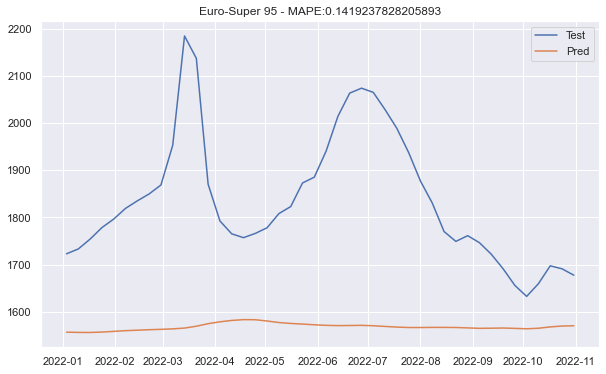

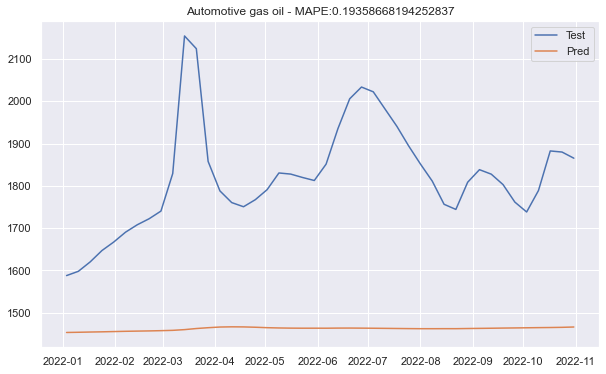

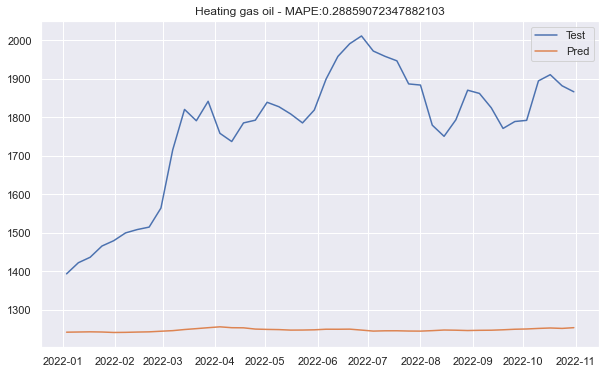

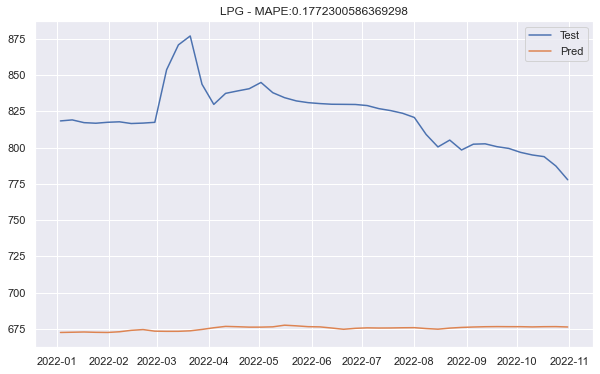

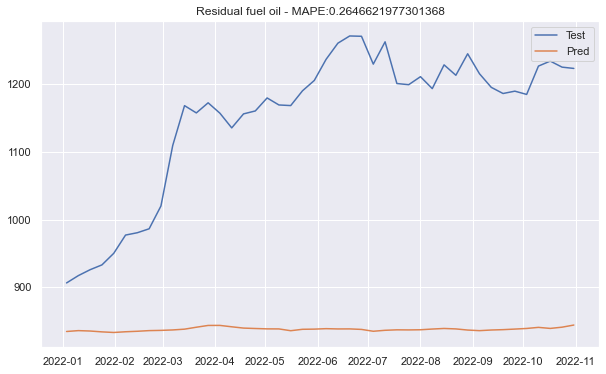

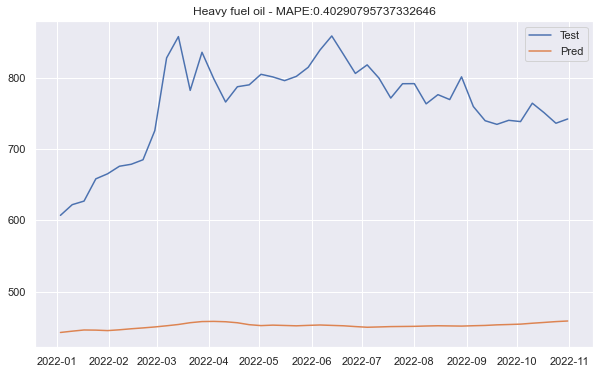

In [25]:
dlCnnExplode = pd.read_excel("Dl Cnn Forecast.xlsx")
for i in dlCnnExplode["PRODUCT"].unique():
    d3 = dlCnnExplode.loc[dlCnnExplode["PRODUCT"] == i].reset_index(drop=True)
    df3 = d3[["Date","Test","Pred"]]
    df3Index = df3.set_index("Date")
    dfTest = df3Index["Test"]
    dfPred = df3Index["Pred"]
    mape = mean_absolute_percentage_error(dfTest.values, dfPred.values)
    
    sns.set()
    f = plt.figure(figsize=(10,6))
    ax = f.add_subplot()
    plt.plot(df3Index.index, df3Index["Test"], label="Test")
    plt.plot(df3Index.index, df3Index["Pred"], label="Pred")
    plt.legend()
    plt.title(f"{i} - MAPE:{mape}")
    plt.show()
    

## LSTM

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 365, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 365, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 365, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 365, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

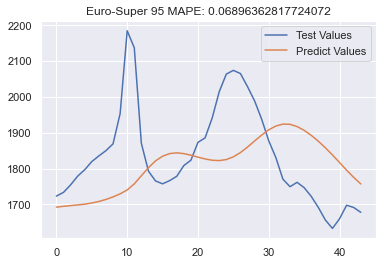

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 365, 128)          66560     
                                                                 
 dropout_3 (Dropout)         (None, 365, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 365, 128)          131584    
                                                                 
 dropout_4 (Dropout)         (None, 365, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

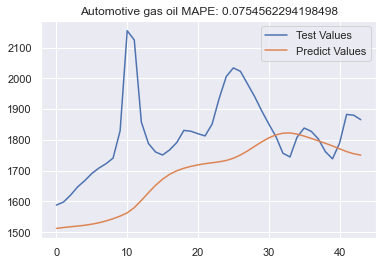

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 365, 128)          66560     
                                                                 
 dropout_6 (Dropout)         (None, 365, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 365, 128)          131584    
                                                                 
 dropout_7 (Dropout)         (None, 365, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

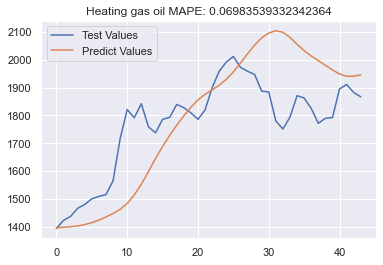

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 365, 128)          66560     
                                                                 
 dropout_9 (Dropout)         (None, 365, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 365, 128)          131584    
                                                                 
 dropout_10 (Dropout)        (None, 365, 128)          0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

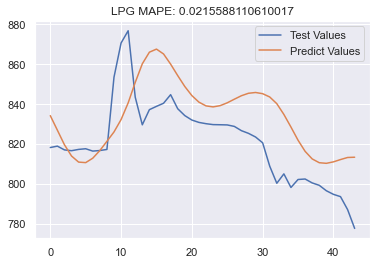

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 365, 128)          66560     
                                                                 
 dropout_12 (Dropout)        (None, 365, 128)          0         
                                                                 
 lstm_13 (LSTM)              (None, 365, 128)          131584    
                                                                 
 dropout_13 (Dropout)        (None, 365, 128)          0         
                                                                 
 lstm_14 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

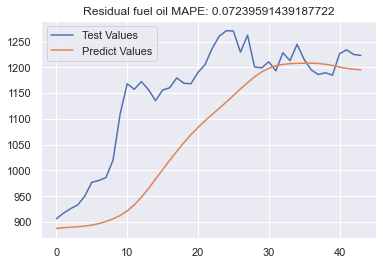

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 365, 128)          66560     
                                                                 
 dropout_15 (Dropout)        (None, 365, 128)          0         
                                                                 
 lstm_16 (LSTM)              (None, 365, 128)          131584    
                                                                 
 dropout_16 (Dropout)        (None, 365, 128)          0         
                                                                 
 lstm_17 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

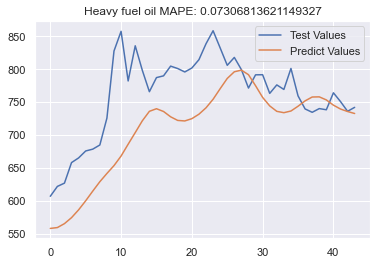

In [4]:
dl = []
for i in data["PRODUCT_NAME"].unique():
    d = data.loc[data["PRODUCT_NAME"] == i].reset_index(drop=True)
    df = d[["SURVEY_DATE","PRICE"]]
    train = df["PRICE"][df["SURVEY_DATE"] <= "2022-01-01"]
    test = df["PRICE"][df["SURVEY_DATE"] > "2022-01-01"]
    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(train.values.reshape(-1,1))

    prediction_days = 365

    x_train = []
    y_train = []

    for x in range(prediction_days, len(scaled_data)):
        x_train.append(scaled_data[x-prediction_days:x, 0])
        y_train.append(scaled_data[x, 0])


    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    model = Sequential()

    model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units =128, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units =128, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()

    history = model.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)
    
    actual_temp = test.values
    total_temp = pd.concat((train, test),axis=0)

    model_inputs = total_temp[len(total_temp)-len(test)-prediction_days:].values
    model_inputs = model_inputs.reshape(-1,1)
    model_inputs = scaler.transform(model_inputs)


# Make Predictions on Test Data
    x_test = []

    for x in range(prediction_days, len(model_inputs)):
        x_test.append(model_inputs[x-prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    pred = model.predict(x_test)
    pred = scaler.inverse_transform(pred)
    
    mape = mean_absolute_percentage_error(test.values, pred)
    
    dl.append({"Date":df.loc[df["SURVEY_DATE"] > "2022-01-02"]["SURVEY_DATE"].values,
               "PRODUCT":i,
              "Test":test.values,
              "Pred":pred,
              "MAPE":mape})
    
    sns.set()
    plt.plot(test.values, label="Test Values")
    plt.plot(pred, label="Predict Values")
    plt.title(f"{i} MAPE: {mape}")
    plt.legend()
    plt.show()
    
dlDf = pd.DataFrame(dl)
dlExplode = dlDf.explode(["Date","Test","Pred"]).reset_index(drop=True)
dlExplode['Pred'] = dlExplode['Pred'].str.get(0)

In [26]:
dlForecast = pd.read_excel("Dl forecast result.xlsx")

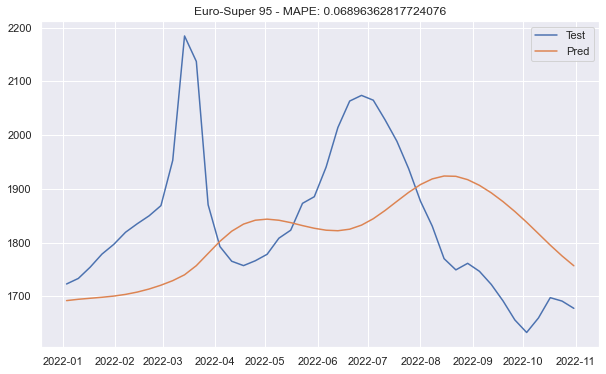

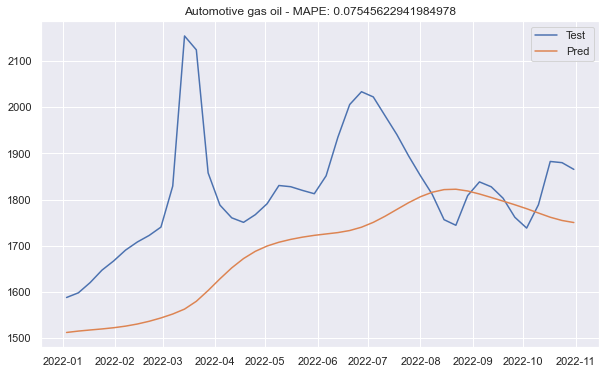

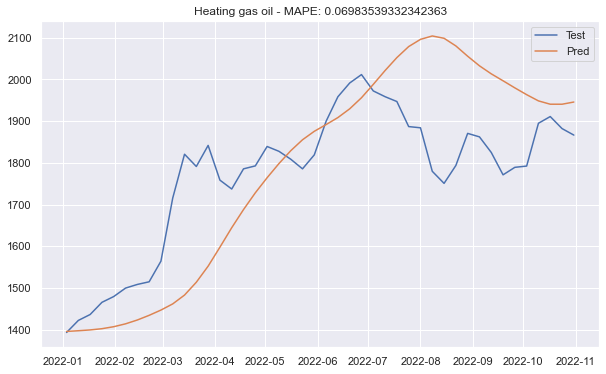

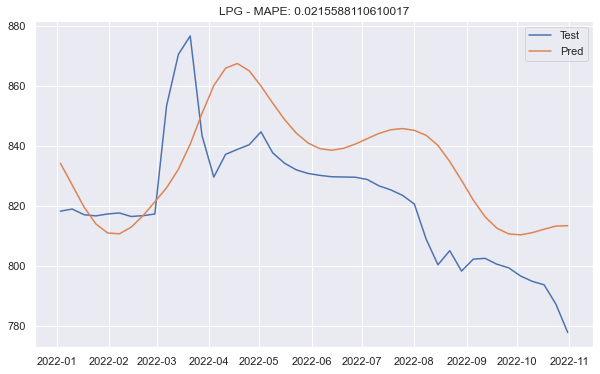

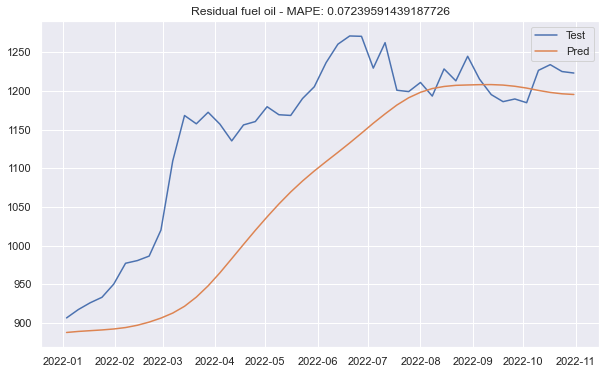

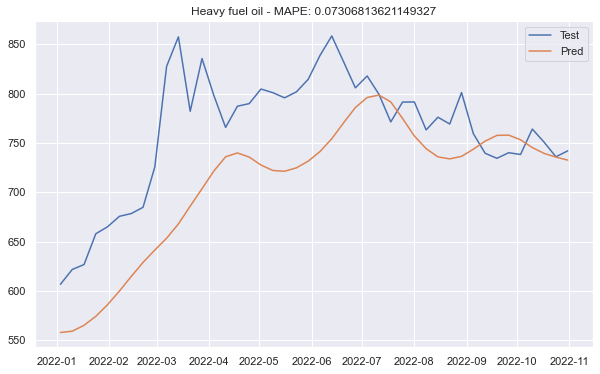

In [27]:
for i in dlForecast["PRODUCT"].unique():
    d = dlForecast.loc[dlForecast["PRODUCT"] == i].reset_index(drop=True)
    df = d[["Date","Test","Pred"]]
    dfIndex = df.set_index("Date")
    dffTest = dfIndex["Test"]
    dffPred = dfIndex["Pred"]
    mapee = mean_absolute_percentage_error(dffTest.values, dffPred.values)
    
    sns.set()
    f = plt.figure(figsize=(10,6))
    ax = f.add_subplot()
    plt.plot(dfIndex.index, dfIndex["Test"], label="Test")
    plt.plot(dfIndex.index, dfIndex["Pred"], label="Pred")
    plt.legend()
    plt.title(f"{i} - MAPE: {mapee}")
    plt.show()
    

## Machine Learning for Time Series 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from sklearn.preprocessing import StandardScaler

In [12]:
ml = []
lagsTune = [10,20]
regressionParam = {'n_estimators': [100,500,800],
                  'max_depth': [3,5,10]}
model_parameters = pd.DataFrame(columns = ['lags','params','mean_absolute_percentage_error','max_depth','Product'])
for i in data["PRODUCT_NAME"].unique():
    d = data.loc[data["PRODUCT_NAME"] == i].reset_index(drop=True)
    df = d[["SURVEY_DATE","PRICE"]]
    
    steps = 52
    trainData = df[:- steps]
    testData = df[-steps:]
    
    forecastTuning = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),lags = 14,transformer_y = StandardScaler())
    
    resultTuning = grid_search_forecaster(forecaster= forecastTuning,
                                     y=trainData["PRICE"],
                                     param_grid=regressionParam,
                                     lags_grid=lagsTune,
                                     steps = 52,
                                     refit              = True,
                                     metric             = 'mean_absolute_percentage_error',
                                     initial_train_size = int(len(trainData)*0.5),
                                     fixed_train_size   = False,
                                     return_best        = True,
                                     verbose            = False)
    
    
    resultTuning["Product"] = i
    
    model_parameters.append(resultTuning,ignore_index=True)

Number of models compared: 18.


loop lags_grid: 100%|██████████████████████████████████████| 2/2 [10:43<00:00, 321.90s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 100}
  Backtesting metric: 0.05926437864528896

Number of models compared: 18.


loop lags_grid: 100%|██████████████████████████████████████| 2/2 [11:33<00:00, 346.58s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 10, 'n_estimators': 500}
  Backtesting metric: 0.061369279582111656

Number of models compared: 18.


loop lags_grid: 100%|██████████████████████████████████████| 2/2 [16:24<00:00, 492.01s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 800}
  Backtesting metric: 0.0698266491672931

Number of models compared: 18.


loop lags_grid: 100%|██████████████████████████████████████| 2/2 [14:04<00:00, 422.41s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 0.060385325500948835

Number of models compared: 18.


loop lags_grid: 100%|██████████████████████████████████████| 2/2 [13:26<00:00, 403.30s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10] 
  Parameters: {'max_depth': 3, 'n_estimators': 800}
  Backtesting metric: 0.08183674109024142

Number of models compared: 18.


loop lags_grid: 100%|██████████████████████████████████████| 2/2 [14:52<00:00, 446.13s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 0.18907121941392954



ValueError: Must pass 2-d input. shape=(6, 12, 5)

In [30]:
bestParams = pd.read_excel("bestParameters.xlsx")
ml = []
for i in data["PRODUCT_NAME"].unique():
    d = data.loc[data["PRODUCT_NAME"] == i].reset_index(drop=True)
    df = d[["SURVEY_DATE","PRICE"]]
    
    steps = 52
    trainData = df[:- steps]
    testData = df[-steps:]
    
    lags = 1
    max_depth= 1
    n_estimator = 1
    for j in bestParams.loc[bestParams["Product"] == i].index:
        lags = bestParams.loc[j]["lags"]
        max_depth = bestParams.loc[j]["max_depth"]
        n_estimator = bestParams.loc[j]["n_estimators"]
        break
        
    regression = RandomForestRegressor(max_depth= max_depth, n_estimators=n_estimator, random_state=123)
    forecastModel = ForecasterAutoreg(regressor=regression,
                                 lags=int(lags))

    forecastModel.fit(trainData["PRICE"])

    predict = forecastModel.predict(steps=steps)

    ml.append({"Date":testData["SURVEY_DATE"].values,
               "PRODUCT":i,
              "Test":testData["PRICE"].values,
              "Pred":predict.values})
    
mlDf = pd.DataFrame(ml)
mlExplode = mlDf.explode(["Date","Test","Pred"]).reset_index(drop=True)

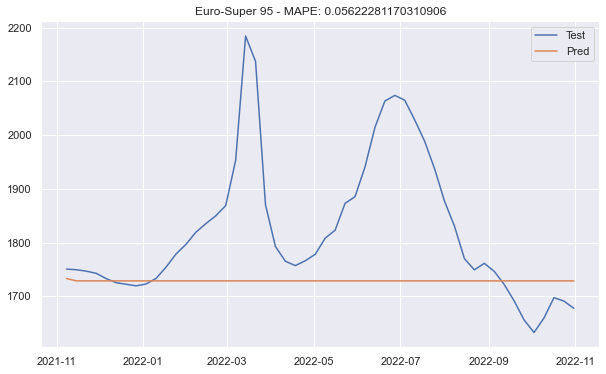

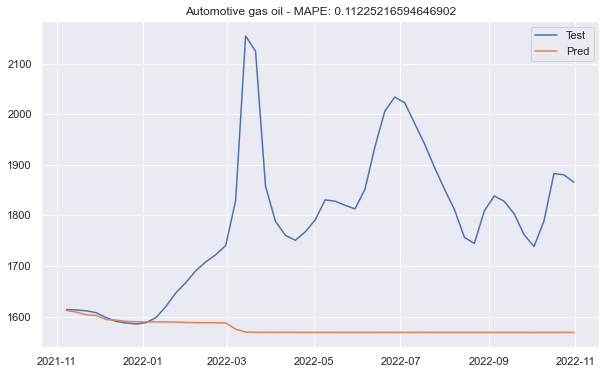

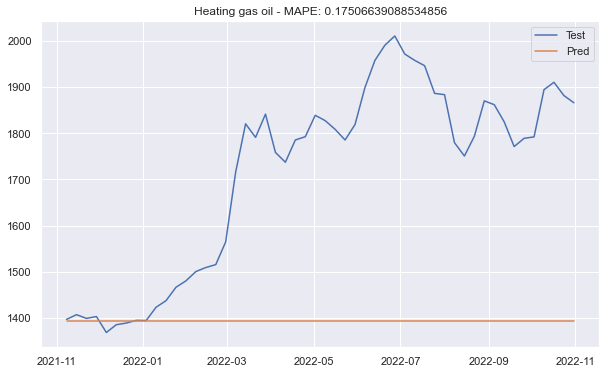

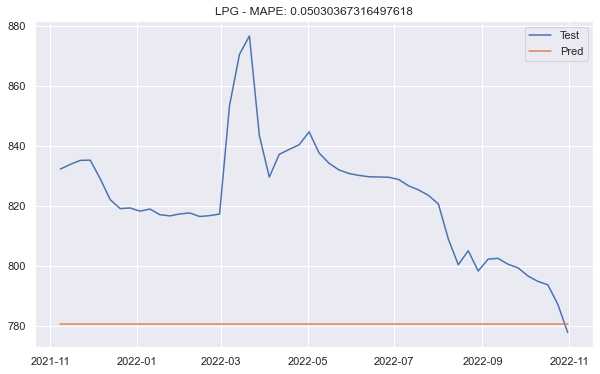

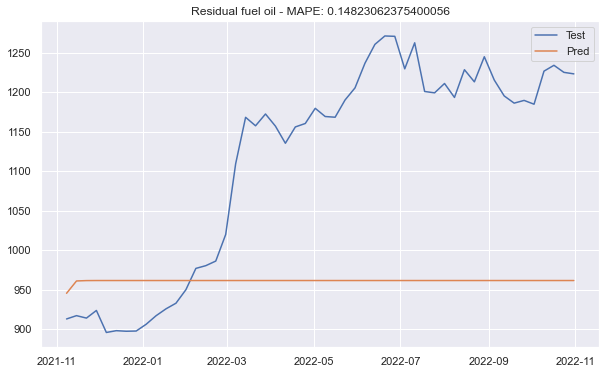

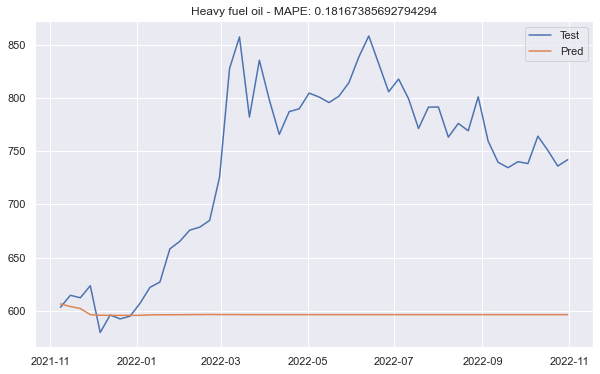

In [32]:
for i in mlExplode["PRODUCT"].unique():
    d2 = mlExplode.loc[mlExplode["PRODUCT"] == i].reset_index(drop=True)
    df2 = d2[["Date","Test","Pred"]]
    dfIndex2 = df2.set_index("Date")
    dfffTest = dfIndex2["Test"]
    dfffPred = dfIndex2["Pred"]
    mapeee = mean_absolute_percentage_error(dfffTest.values, dfffPred.values)
    
    sns.set()
    f = plt.figure(figsize=(10,6))
    ax = f.add_subplot()
    plt.plot(dfIndex2.index, dfIndex2["Test"], label="Test")
    plt.plot(dfIndex2.index, dfIndex2["Pred"], label="Pred")
    plt.legend()
    plt.title(f"{i} - MAPE: {mapeee}")
    plt.show()
    

## Prophet Model

In [19]:
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler

In [20]:
#filterOfDate = data.loc[data["SURVEY_DATE"] < "2021-02-15"]
trans = MinMaxScaler()
dataValues = trans.fit_transform(data[["PRICE"]])
dataScaled = pd.DataFrame(dataValues, columns=["Price"])
modelData = {"ds":data.iloc[0:]["SURVEY_DATE"],
           "y":dataScaled.iloc[0:]["Price"],
            "Article":data.iloc[0:]["PRODUCT_NAME"]}
modelDataDf = pd.DataFrame(modelData)

final = pd.DataFrame(columns=['Article','ds','yhat'])

In [9]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.80],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)

In [16]:
## Parameter Tuning

filterOfDateTest = data.loc[data["SURVEY_DATE"] > "2022-01-03"]
grouped = modelDataDf.groupby("Article")
model_parameters = pd.DataFrame(columns = ['Product','MAPE','Parameters'])
for g in grouped.groups:
    group = grouped.get_group(g)
    dataProduct = filterOfDateTest.loc[filterOfDateTest["PRODUCT_NAME"] == g]
    
    for p in grid:
        model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         seasonality_mode = p['seasonality_mode'],
                         changepoint_range=1,
                         yearly_seasonality = True,
                         interval_width=0.95)
        
        model.fit(group)
        future = model.make_future_dataframe(periods=156, freq="W")
        forecast = model.predict(future)
        
        forecast['Article'] = g
        dataForecast = forecast.loc[forecast["ds"].between("2022-01-03", "2022-10-30")]
           
        error = mean_absolute_percentage_error(dataProduct["PRICE"], dataForecast["yhat"])
        model_parameters = model_parameters.append({'Product':g,'MAPE':error,'Parameters':p},ignore_index=True)
    
        print(f"{g} için {p} parametreleri ile {error}")

NameError: name 'grid' is not defined

In [14]:
#model_parameters.to_excel("Best Parameters.xlsx")
model_parameters = pd.read_excel("Best Parameters.xlsx")

In [15]:
article = model_parameters["Product"].unique()
parameters = pd.DataFrame(columns = ['Product','MAPE','Parameters'])
for art in article:
    dataParam = model_parameters.loc[model_parameters["Product"] == art].reset_index()
    dataSort = dataParam.sort_values(by="MAPE")
    minMape = dataSort.iloc[0]["MAPE"]
    param = dataSort.iloc[0]["Parameters"]
    parameters = parameters.append({"Product":art, "MAPE":minMape, "Parameters":param},ignore_index=True)
    

In [16]:
parameters

Product      MAPE  \
0  Automotive gas oil  0.034559   
1       Euro-Super 95  0.043325   
2     Heating gas oil  0.049430   
3      Heavy fuel oil  0.046243   
4                 LPG  0.014756   
5   Residual fuel oil  0.044768   

                                          Parameters  
0  {'changepoint_prior_scale': 0.1, 'n_changepoin...  
1  {'changepoint_prior_scale': 0.1, 'n_changepoin...  
2  {'changepoint_prior_scale': 0.55, 'n_changepoi...  
3  {'changepoint_prior_scale': 0.75, 'n_changepoi...  
4  {'changepoint_prior_scale': 0.4, 'n_changepoin...  
5  {'changepoint_prior_scale': 0.1, 'n_changepoin...

In [21]:
grouped = modelDataDf.groupby("Article")
for g in grouped.groups:
    group = grouped.get_group(g)    
    
    for i in parameters.loc[parameters["Product"] == g].index:
        param = parameters.loc[i]["Parameters"]
        
    paramDict = eval(param)
    #grid = ParameterGrid(paramDict)
    model = Prophet(changepoint_prior_scale = paramDict['changepoint_prior_scale'],
                    seasonality_mode = paramDict['seasonality_mode'],
                    n_changepoints = paramDict['n_changepoints'],
                    yearly_seasonality = True,
                    interval_width=0.95)
        
    model.fit(group)
    future = model.make_future_dataframe(periods=26, freq="W")
    forecast = model.predict(future)

        
    forecast['Article'] = g
    final = pd.concat([final, forecast], ignore_index=True)
    
prophetForecastData = final[["ds","Article","yhat"]]    
re_scaled_features = trans.inverse_transform(prophetForecastData[["yhat"]])
re_scaled_df = pd.DataFrame(re_scaled_features, columns = ["inverse yhat"])
prophetForecastData["inverse yhat"] = re_scaled_df

cmdstanpy  DEBUG cmd: where.exe tbb.dll
cwd: None
cmdstanpy  DEBUG Adding TBB (C:\Users\Seher\anaconda3\lib\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: C:\Users\Seher\AppData\Local\Temp\tmpxr01fyo0\bwi0ptqx.json
cmdstanpy  DEBUG input tempfile: C:\Users\Seher\AppData\Local\Temp\tmpxr01fyo0\ehpqt_nv.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['C:\\Users\\Seher\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=37250', 'data', 'file=C:\\Users\\Seher\\AppData\\Local\\Temp\\tmpxr01fyo0\\bwi0ptqx.json', 'init=C:\\Users\\Seher\\AppData\\Local\\Temp\\tmpxr01fyo0\\ehpqt_nv.json', 'output', 'file=C:\\Users\\Seher\\AppData\\Local\\Temp\\tmpxr01fyo0\\prophet_modelor248kgi\\prophet_model-20230122211906.csv', 'method=opt

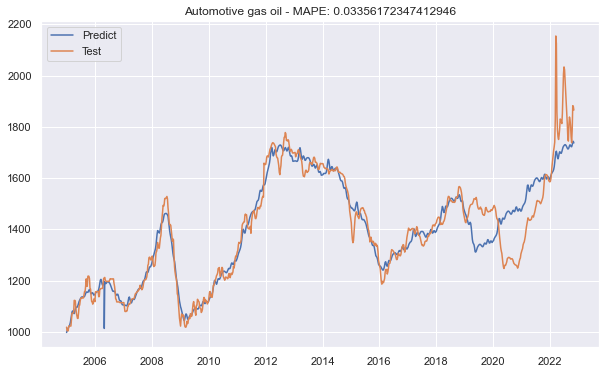

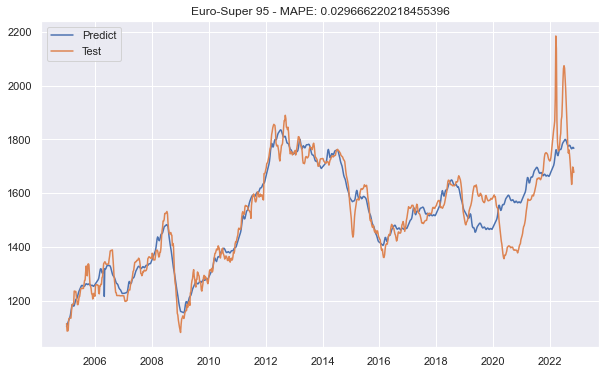

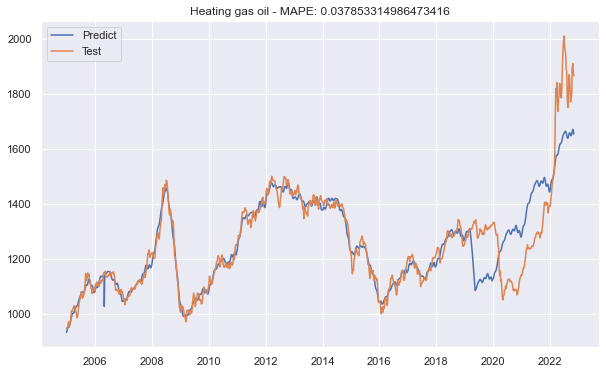

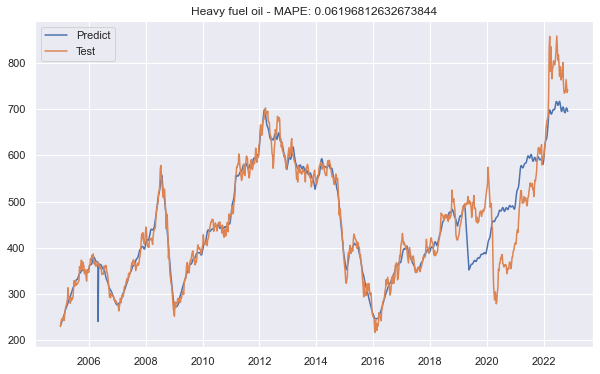

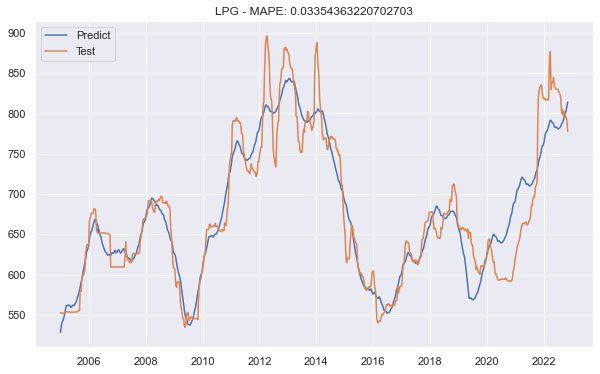

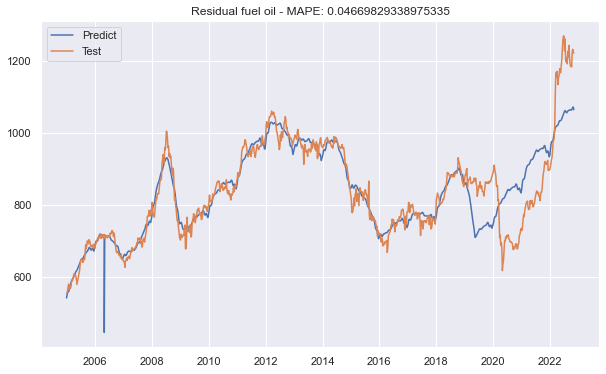

In [24]:
prophetForecastDataTest = prophetForecastData.loc[prophetForecastData["ds"] <= "2022-10-31"]

grouped = modelDataDf.groupby("Article")
for g in grouped.groups:
    y_pred = prophetForecastDataTest.loc[prophetForecastDataTest["Article"] == g]
    y_test = data.loc[data["PRODUCT_NAME"] == g]
    Prophetmape = mean_absolute_percentage_error(y_test["PRICE"].values, y_pred["inverse yhat"].values)

    sns.set()
    f = plt.figure(figsize=(10,6))
    ax = f.add_subplot()
    plt.plot(y_pred["ds"], y_pred["inverse yhat"], label="Predict")
    plt.plot(y_test["SURVEY_DATE"], y_test["PRICE"], label="Test")
    plt.legend()
    plt.title(f"{g} - MAPE: {Prophetmape}")
    plt.show()